# Deep Learning - Project 1
### Jeffery Boczkaja

## 1. Load the dataset, airfoil_self_noise.DAT, into memory.

In [1]:
import pandas as pd
df = pd.read_csv('airfoil_self_noise.dat', delimiter='\t', header=None)

df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [2]:
df.columns = ['frequency', 'attack', 'chord', 'velocity', 'suction', 'sound']
df.head()

,frequency,attack,chord,velocity,suction,sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


## 2. Clean the data and check missing values for this dataset.

In [3]:
df.isnull().sum(axis=0)

frequency    0
attack       0
chord        0
velocity     0
suction      0
sound        0
dtype: int64

No missing data, what luck!

## 3. Split the data into 80% of training and 20% of the test dataset. Build a simple linear regression to forecast "Scaled sound pressure level" using all other features and scikit-learn package. 

In [4]:
df.describe()

,frequency,attack,chord,velocity,suction,sound
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

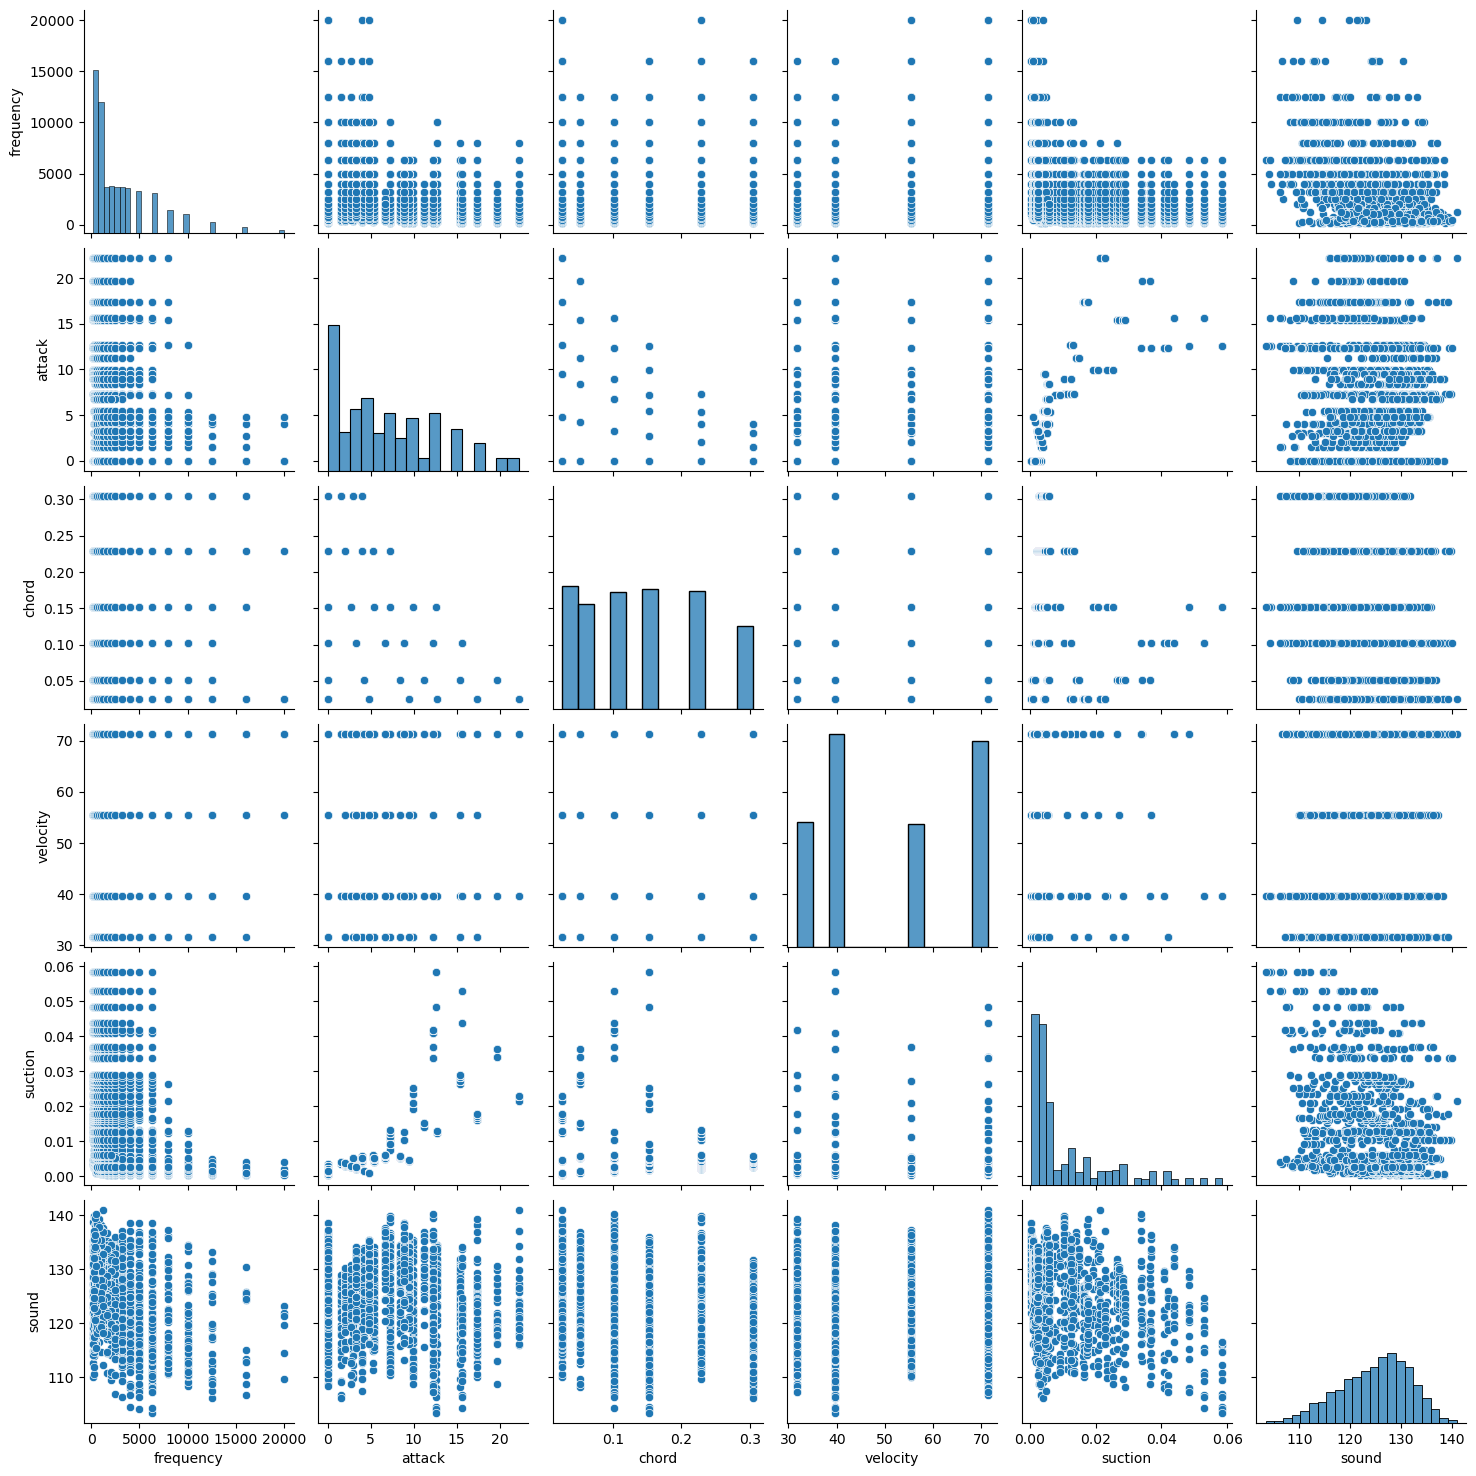

In [5]:
import seaborn as sns
sns.pairplot(df)

In [6]:
X = df.drop('sound',axis=1)
y = df['sound']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2023)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [8]:
X_train[:5]

array([[-0.28270492,  0.08387513,  0.98514398, -1.23695529,  0.16230606],
       [-0.60170917, -1.1540908 ,  0.98514398, -0.72523474, -0.65269233],
       [-0.41030662,  0.93179701, -0.3669262 , -0.72523474,  2.25519103],
       [-0.84096237, -0.4757533 ,  0.98514398, -1.23695529, -0.45862152],
       [ 1.63132062, -0.69621299,  0.17390187, -0.72523474, -0.6213343 ]])

### What's the test error for this scikit-learn regression model?

In [9]:
'The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred))

'The mean square error is 21.9398'

## 4. Preprocess the data using the normalization method to convert all features into the range of [0,1].

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train[:5]

array([[0.09090909, 0.32882883, 0.72727273, 0.        , 0.22179591],
       [0.04040404, 0.        , 0.72727273, 0.19949495, 0.03679375],
       [0.07070707, 0.55405405, 0.27272727, 0.19949495, 0.69687446],
       [0.00252525, 0.18018018, 0.72727273, 0.        , 0.08084723],
       [0.39393939, 0.12162162, 0.45454545, 0.19949495, 0.04391193]])

## 5. Build a deep learning regression model to forecast "Scaled sound pressure level" using all other features and TensorFlow. Please use only two layers of the neuron network. You choose the number of neurons to use in the first layer. 

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
model = keras.Sequential(
    [
        layers.Dense(13, activation='relu'),
        layers.Dense(1),
    ]
)

In [14]:
model.compile(optimizer='adam',loss='mse')

In [15]:
tf.random.set_seed(85)
model.fit(x=X_train,y=y_train,batch_size=64,epochs=100,
          validation_data=(X_test,y_test)
          )

Epoch 1/100
19/19 [==============================] - 1s 16ms/step - loss: 15677.4521 - val_loss: 15675.6611
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 15637.5479 - val_loss: 15635.6846
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 15597.4512 - val_loss: 15594.6562
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 15555.2344 - val_loss: 15550.8623
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 15509.7070 - val_loss: 15502.6182
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 15459.3975 - val_loss: 15449.1191
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 15403.6924 - val_loss: 15389.6475
Epoch 8/100
19/19 [==============================] - 0s 5ms/step - loss: 15342.0596 - val_loss: 15324.1191
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 15274.0049 - val_loss: 15252.3975
Epoch 10/100
19/19 [================

19/19 [==============================] - 0s 4ms/step - loss: 3981.0349 - val_loss: 3884.2471
Epoch 78/100
19/19 [==============================] - 0s 4ms/step - loss: 3847.9558 - val_loss: 3752.8704
Epoch 79/100
19/19 [==============================] - 0s 4ms/step - loss: 3718.0486 - val_loss: 3625.7229
Epoch 80/100
19/19 [==============================] - 0s 4ms/step - loss: 3592.3335 - val_loss: 3501.5615
Epoch 81/100
19/19 [==============================] - 0s 5ms/step - loss: 3469.6619 - val_loss: 3381.5476
Epoch 82/100
19/19 [==============================] - 0s 4ms/step - loss: 3350.9558 - val_loss: 3265.1196
Epoch 83/100
19/19 [==============================] - 0s 4ms/step - loss: 3235.8728 - val_loss: 3152.3508
Epoch 84/100
19/19 [==============================] - 0s 5ms/step - loss: 3124.3730 - val_loss: 3043.1675
Epoch 85/100
19/19 [==============================] - 0s 4ms/step - loss: 3016.5471 - val_loss: 2937.5125
Epoch 86/100
19/19 [==============================] - 0s 4m

### What's the test error for this model?

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [17]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [18]:
'The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred))

'The mean square error is 1767.2211'

In [19]:
'The root of mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred,squared = False))

'The root of mean square error is 42.0383'

In [20]:
'The mean absolute error is {0:.4f}'.format(mean_absolute_error(y_test,y_pred))

'The mean absolute error is 36.0474'

## 6.Can you improve the model performance of question 5 by adjusting the number of neurons or the optimization algorithm?

In [21]:
model = keras.Sequential(
    [
        layers.Dense(1000, activation='relu'),
        layers.Dense(1),
    ]
)

model.compile(optimizer='adam',loss='mse')

tf.random.set_seed(85)
model.fit(x=X_train,y=y_train,batch_size=64,epochs=100,
          validation_data=(X_test,y_test)
          )

y_pred = model.predict(X_test)

Epoch 1/100
19/19 [==============================] - 1s 13ms/step - loss: 15476.8340 - val_loss: 15275.9414
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 14969.2842 - val_loss: 14578.2959
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 14076.9404 - val_loss: 13442.4131
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 12737.8037 - val_loss: 11875.9023
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 11010.4287 - val_loss: 9962.4170
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 9008.4297 - val_loss: 7883.0376
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 6939.7656 - val_loss: 5848.0273
Epoch 8/100
19/19 [==============================] - 0s 6ms/step - loss: 5010.1714 - val_loss: 4074.8679
Epoch 9/100
19/19 [==============================] - 0s 7ms/step - loss: 3423.2659 - val_loss: 2714.4370
Epoch 10/100
19/19 [=========================

Epoch 80/100
19/19 [==============================] - 0s 4ms/step - loss: 33.9909 - val_loss: 31.1401
Epoch 81/100
19/19 [==============================] - 0s 5ms/step - loss: 33.0224 - val_loss: 30.2662
Epoch 82/100
19/19 [==============================] - 0s 5ms/step - loss: 32.1072 - val_loss: 29.5083
Epoch 83/100
19/19 [==============================] - 0s 5ms/step - loss: 31.2894 - val_loss: 28.8187
Epoch 84/100
19/19 [==============================] - 0s 5ms/step - loss: 30.5785 - val_loss: 28.1686
Epoch 85/100
19/19 [==============================] - 0s 5ms/step - loss: 29.8510 - val_loss: 27.6386
Epoch 86/100
19/19 [==============================] - 0s 5ms/step - loss: 29.2697 - val_loss: 27.0730
Epoch 87/100
19/19 [==============================] - 0s 5ms/step - loss: 28.6820 - val_loss: 26.5711
Epoch 88/100
19/19 [==============================] - 0s 5ms/step - loss: 28.1535 - val_loss: 26.1475
Epoch 89/100
19/19 [==============================] - 0s 5ms/step - loss: 27.6948 

In [22]:
'The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred))

'The mean square error is 23.0726'

Yes we can improve the model by adding more neurons in the first layer, we improved it greatly by increasing the neurons from 13 to 1000.

## 7. Build a deep learning regression model to forecast "Scaled sound pressure level" using all other features and PyTorch. Please use only two layers of the neuron network. You choose the number of neurons to use in the first layer. 

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [24]:
X_train = torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.float32).reshape(-1,1))

In [25]:
X_train[:5]

tensor([[0.0909, 0.3288, 0.7273, 0.0000, 0.2218],
        [0.0404, 0.0000, 0.7273, 0.1995, 0.0368],
        [0.0707, 0.5541, 0.2727, 0.1995, 0.6969],
        [0.0025, 0.1802, 0.7273, 0.0000, 0.0808],
        [0.3939, 0.1216, 0.4545, 0.1995, 0.0439]])

In [26]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]

hidden_size = 10
print(input_size)
print(output_size)

5
1


In [27]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.hidden = torch.nn.Linear(input_size, hidden_size)  
        self.predict = torch.nn.Linear(hidden_size, output_size)  
    def forward(self, x):
        x = F.relu(self.hidden(x))     
        y_pred = self.predict(x)            
        return y_pred

In [28]:
model = LinearRegressionModel(input_size, hidden_size, output_size)
l = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

In [29]:
torch.manual_seed(1)
np.random.seed(0)

num_epochs = 100
for epoch in range(num_epochs):
    y_pred = model(X_train.requires_grad_())
    loss= l(y_pred, y_train)
    optimizer.zero_grad()
    
    loss.backward()

    optimizer.step()
  
    print('epoch {0}, loss:{1:.4f}'.format(epoch, loss.item()))

epoch 0, loss:15702.1729
epoch 1, loss:15646.6660
epoch 2, loss:15593.2344
epoch 3, loss:15538.7119
epoch 4, loss:15479.2246
epoch 5, loss:15411.1045
epoch 6, loss:15331.8418
epoch 7, loss:15240.7275
epoch 8, loss:15137.3564
epoch 9, loss:15021.2031
epoch 10, loss:14891.8740
epoch 11, loss:14749.0312
epoch 12, loss:14592.3760
epoch 13, loss:14421.6357
epoch 14, loss:14236.5586
epoch 15, loss:14036.9287
epoch 16, loss:13822.5430
epoch 17, loss:13593.3066
epoch 18, loss:13349.1084
epoch 19, loss:13089.8389
epoch 20, loss:12815.3057
epoch 21, loss:12525.4473
epoch 22, loss:12220.0664
epoch 23, loss:11899.3877
epoch 24, loss:11563.0674
epoch 25, loss:11210.6572
epoch 26, loss:10842.9990
epoch 27, loss:10461.1787
epoch 28, loss:10066.1621
epoch 29, loss:9658.9365
epoch 30, loss:9240.6797
epoch 31, loss:8812.7549
epoch 32, loss:8376.6934
epoch 33, loss:7934.1982
epoch 34, loss:7487.1279
epoch 35, loss:7037.4990
epoch 36, loss:6587.4673
epoch 37, loss:6139.3237
epoch 38, loss:5695.4731
epoch 

### What's the test error for this model?

In [30]:
X_test = torch.from_numpy(X_test.astype(np.float32))
y_pred = model(X_test).detach().numpy()

In [31]:
'The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred))

'The mean square error is 762.2026'

In [32]:
'The root of mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred,squared = False))

'The root of mean square error is 27.6080'

In [33]:
'The mean absolute error is {0:.4f}'.format(mean_absolute_error(y_test,y_pred))

'The mean absolute error is 22.2727'

## 8 Can you improve the model performance of question 7 by adjusting the number of neurons or the optimization algorithm?

In [67]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
#specify the number of neuron for the first layer
hidden_size = 10000
print(input_size)
print(output_size)

5
1


In [84]:
'The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred))

'The mean square error is 20.9714'

In [72]:
df = pd.read_csv('airfoil_self_noise.dat', delimiter='\t', header=None)

df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [73]:
df.columns = ['frequency', 'attack', 'chord', 'velocity', 'suction', 'sound']
df.head()

,frequency,attack,chord,velocity,suction,sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [74]:
X = df.drop('sound',axis=1)
y = df['sound']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2023)

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [76]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
X_train = torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.float32).reshape(-1,1))

In [78]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]

hidden_size = 1000
print(input_size)
print(output_size)

5
1


In [79]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.hidden = torch.nn.Linear(input_size, hidden_size)  
        self.predict = torch.nn.Linear(hidden_size, output_size)  
    def forward(self, x):
        x = F.relu(self.hidden(x))     
        y_pred = self.predict(x)            
        return y_pred

In [80]:
model = LinearRegressionModel(input_size, hidden_size, output_size)
l = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

In [81]:
torch.manual_seed(1)
np.random.seed(0)

num_epochs = 100
for epoch in range(num_epochs):
    y_pred = model(X_train.requires_grad_())
    loss= l(y_pred, y_train)
    optimizer.zero_grad()
    
    loss.backward()

    optimizer.step()

In [82]:
X_test = torch.from_numpy(X_test.astype(np.float32))
y_pred = model(X_test).detach().numpy()

In [83]:
'The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred))

'The mean square error is 20.9714'

We can improve the model by changing the number of neurons, when we increse the number of neurons from 10 to 1000 we get a much better model!